In [42]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
df=pd.read_excel('1_Week3.xlsx')
df.head()

,Days,M,T,W,TH,F,M1,T2,W2,TH2,F2,M3,T3,W3,TH3,F3
0,1,4,5,5,6,7,1,2,3,4,5,3.0,4.0,5.0,6.0,7.0
1,2,1,2,3,4,5,5,5,6,6,7,3.0,4.0,5.0,6.0,7.0
2,3,3,4,5,6,7,2,3,4,5,6,5.0,6.0,6.0,7.0,NaN
3,4,1,2,3,4,5,1,2,3,4,5,1.0,NaN,3.0,4.0,5.0
4,5,2,3,4,5,6,5,5,6,6,7,NaN,6.0,6.0,7.0,NaN


In [39]:
df1=df[['M3','T3','W3','TH3','F3']]

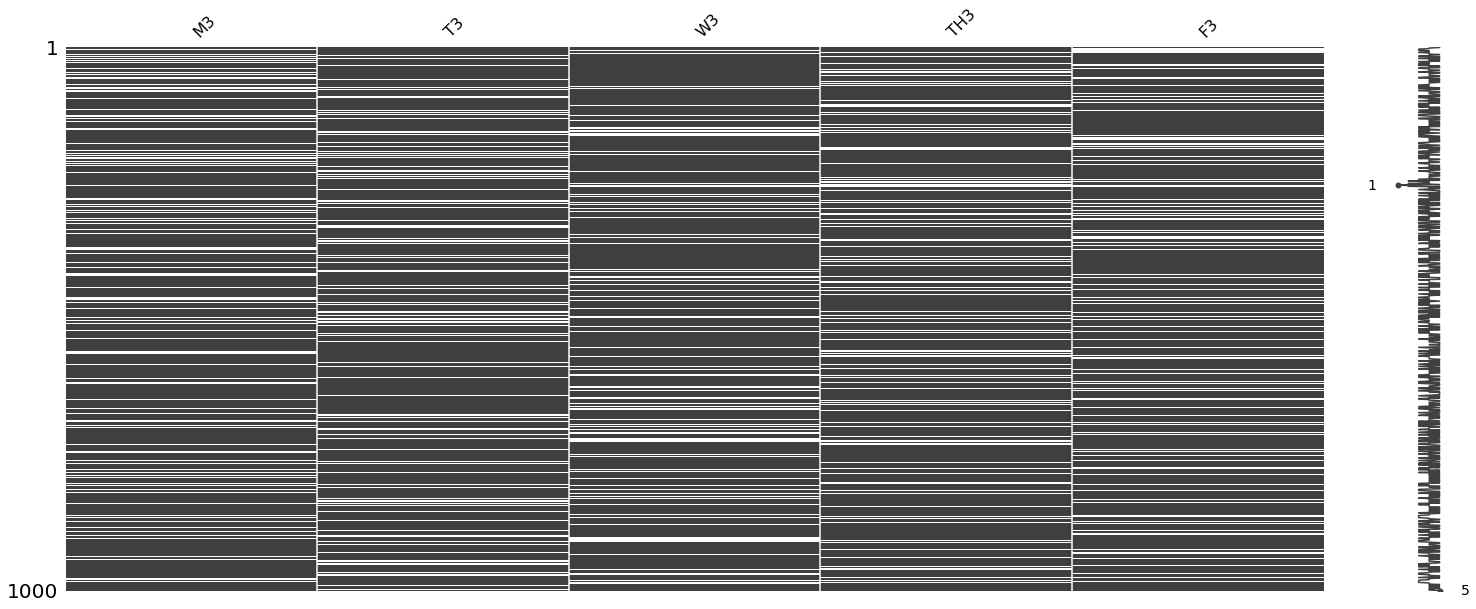

In [93]:
import pandas as pd 
import missingno as msno 
  

  
# Visualize missing values as a matrix 
msno.matrix(df1)

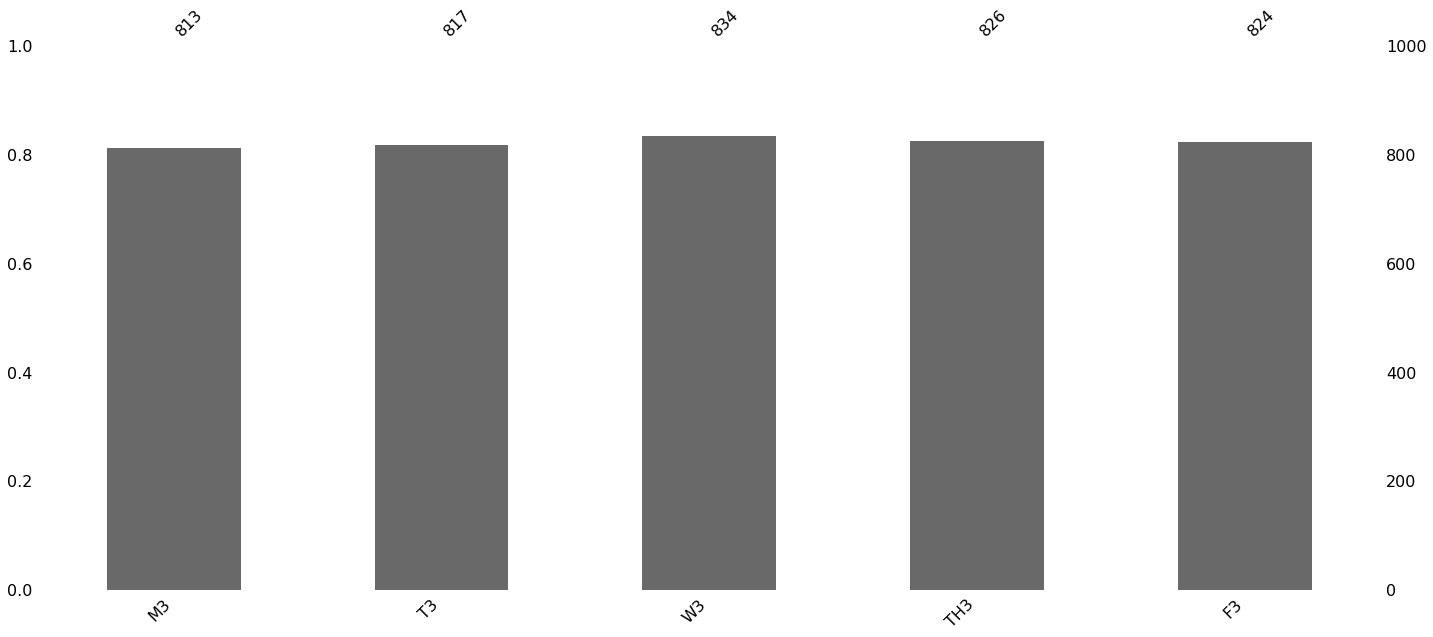

In [94]:
msno.bar(df1)

In [95]:
df1.isnull().sum()

M3     187
T3     183
W3     166
TH3    174
F3     176
dtype: int64

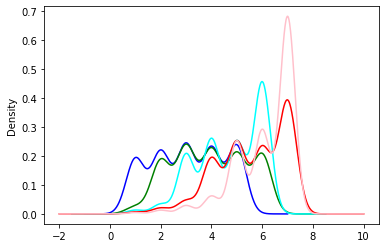

In [96]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['M3'].plot(kind='kde', ax=ax, color='blue')
df['T3'].plot(kind='kde', ax=ax, color='green')
df['W3'].plot(kind='kde', ax=ax, color='cyan')
df['TH3'].plot(kind='kde', ax=ax, color='red')
df['F3'].plot(kind='kde', ax=ax, color='pink')

In [40]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp_mice = IterativeImputer(n_nearest_features=5)
df_mice=imp_mice.fit_transform(df1)
df_mice=pd.DataFrame(df_mice,columns=df1.columns)

/usr/local/lib/python3.6/dist-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


In [98]:
df_mice_final=df_mice.round(0)

In [101]:
df_mice_final.to_excel('Week3_mice.xlsx')

In [8]:
from sklearn.impute import KNNImputer
imp_KNN = KNNImputer(n_neighbors=5,weights='uniform')
df_KNN=imp_KNN.fit_transform(df1)
df_KNN=pd.DataFrame(df_KNN,columns=df1.columns)

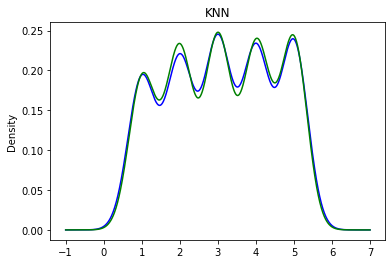

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['M3'].plot(kind='kde', ax=ax, color='blue')
df_KNN['M3'].plot(kind='kde', ax=ax, color='green',title='KNN')

In [10]:
df_mice.to_excel('MICE_Week3.xlsx')

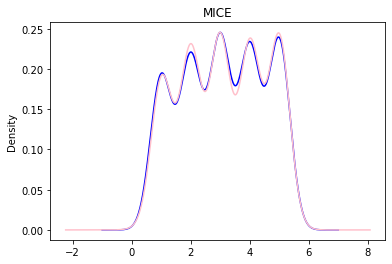

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['M3'].plot(kind='kde', ax=ax, color='blue')
df_mice['M3'].plot(kind='kde', ax=ax, color='pink',title='MICE')

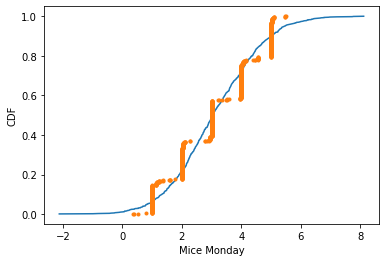

In [43]:
# Compute mean and standard deviation: mu, sigma
mu = np.mean(df_mice['M3'])
sigma = np.std(df_mice['M3'])

# Sample out of a normal distribution with this mu and sigma: samples
samples_normal = np.random.normal(mu, sigma, size=1000)

# Get the CDF of the samples and of the data
x_normal, y_normal = ecdf(samples_normal)
x, y = ecdf(df_mice['M3'])

# Plot the CDFs and show the plot
_ = plt.plot(x_normal, y_normal)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Mice Monday')
_ = plt.ylabel('CDF')
plt.show()

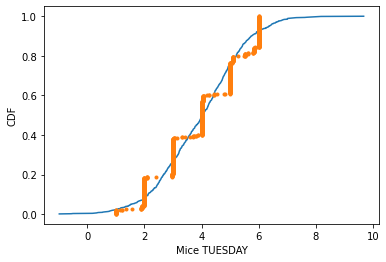

In [44]:
# Compute mean and standard deviation: mu, sigma
mu = np.mean(df_mice['T3'])
sigma = np.std(df_mice['T3'])

# Sample out of a normal distribution with this mu and sigma: samples
samples_normal = np.random.normal(mu, sigma, size=1000)

# Get the CDF of the samples and of the data
x_normal, y_normal = ecdf(samples_normal)
x, y = ecdf(df_mice['T3'])

# Plot the CDFs and show the plot
_ = plt.plot(x_normal, y_normal)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Mice TUESDAY')
_ = plt.ylabel('CDF')
plt.show()

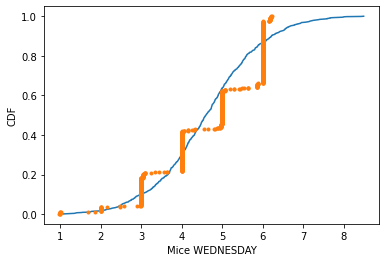

In [45]:
# Compute mean and standard deviation: mu, sigma
mu = np.mean(df_mice['W3'])
sigma = np.std(df_mice['W3'])

# Sample out of a normal distribution with this mu and sigma: samples
samples_normal = np.random.normal(mu, sigma, size=1000)

# Get the CDF of the samples and of the data
x_normal, y_normal = ecdf(samples_normal)
x, y = ecdf(df_mice['W3'])

# Plot the CDFs and show the plot
_ = plt.plot(x_normal, y_normal)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Mice WEDNESDAY')
_ = plt.ylabel('CDF')
plt.show()

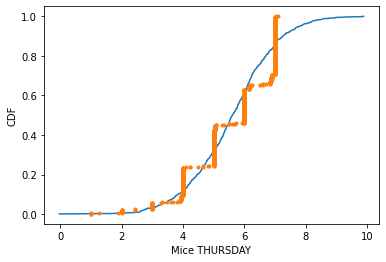

In [46]:
# Compute mean and standard deviation: mu, sigma
mu = np.mean(df_mice['TH3'])
sigma = np.std(df_mice['TH3'])

# Sample out of a normal distribution with this mu and sigma: samples
samples_normal = np.random.normal(mu, sigma, size=1000)

# Get the CDF of the samples and of the data
x_normal, y_normal = ecdf(samples_normal)
x, y = ecdf(df_mice['TH3'])

# Plot the CDFs and show the plot
_ = plt.plot(x_normal, y_normal)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Mice THURSDAY')
_ = plt.ylabel('CDF')
plt.show()

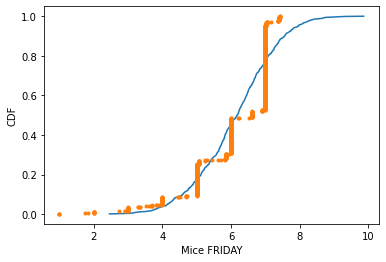

In [47]:
# Compute mean and standard deviation: mu, sigma
mu = np.mean(df_mice['F3'])
sigma = np.std(df_mice['F3'])

# Sample out of a normal distribution with this mu and sigma: samples
samples_normal = np.random.normal(mu, sigma, size=1000)

# Get the CDF of the samples and of the data
x_normal, y_normal = ecdf(samples_normal)
x, y = ecdf(df_mice['F3'])

# Plot the CDFs and show the plot
_ = plt.plot(x_normal, y_normal)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Mice FRIDAY')
_ = plt.ylabel('CDF')
plt.show()

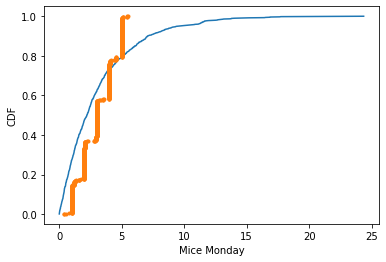

In [13]:
mean = np.mean(df_mice['M3'])
samples_exp = np.random.exponential(mean, size=1000)
x, y = ecdf(df_mice['M3'])
x_theor, y_theor = ecdf(samples_exp)
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Mice Monday')
_ = plt.ylabel('CDF')
plt.show()


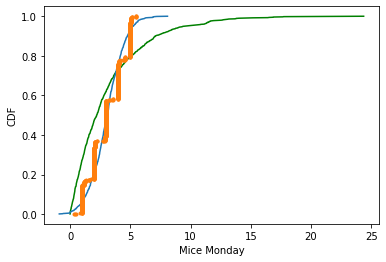

In [14]:
x, y = ecdf(df_mice['M3'])
_ = plt.plot(x_theor, y_theor,color='green')
_ = plt.plot(x_normal, y_normal)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Mice Monday')
_ = plt.ylabel('CDF')
plt.show()

In [2]:
df2=pd.read_excel('Week3_mice.xlsx')
df2.head()

,Unnamed: 0,M3,T3,W3,TH3,F3,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,0,3,4,5,6,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,3,4,5,6,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,5,6,6,7,7,NaN,NaN,x,M,xM,x-mean,(x-mean)^2*M,(x-mean)^3*M,(x-mean)^4*M,NaN,NaN,-1.243934,NaN,NaN,-0.085558
3,3,1,2,3,4,5,NaN,NaN,0,2,0,-3.102,19.2448,-59.6974,185.181,NaN,NaN,NaN,m3,-0.234698,NaN
4,4,5,6,6,7,7,NaN,NaN,1,168,168,-2.102,742.292,-1560.3,3279.75,NaN,Kurtosis,1.756066,m2,1.959596,NaN


In [3]:
df3=df2[['M3','T3','W3','TH3','F3']]

In [4]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Feature: 0, Score: 0.00950
Feature: 1, Score: 0.98112
Feature: 2, Score: 0.00259
Feature: 3, Score: 0.00679


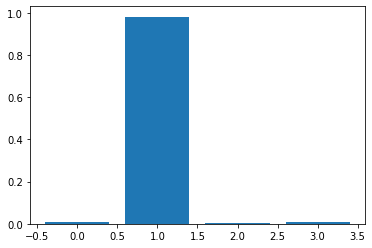

In [35]:
from matplotlib import pyplot
# fit the model
clf.fit(df2[['F3','T3','W3','TH3']], df2[['M3']])
# get importance
importance = clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [36]:
clf.fit(df2[['T3']],df2[['M3']])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [37]:
from sklearn.metrics import r2_score
r2_score(df2[['M3']],clf.predict(df2[['T3']]))

0.9601092509233401

In [ ]:
M=clf.predict(df2[['T3']])
T=

In [ ]:
M=96%
T=98%
W=98%
TH=98%
F=95%